# **Dados do Indice IBOVESPA B3**

## **O problema**

Você foi recentemente alocado em uma equipe de cientistas de dados de um grande fundo de investimentos brasileiro. Sua missão inicial é desenvolver um modelo preditivo capaz de prever se o índice IBOVESPA vai fechar em alta ou baixa no dia seguinte, com base em dados históricos do próprio índice. Esse modelo será usado como insumo para alimentar dashboards internos de tomada de decisão dos analistas quantitativos da empresa.

### **Dados**

Utilize os dados históricos do índice IBOVESPA, disponíveis publicamente: https://br.investing.com/indices/bovespa-historical-data
Requisitos:  
• Selecione o período “diário”.  
• Baixe um intervalo de pelo menos 2 anos de dados.  
• Realize o pré-processamento necessário para utilizar os dados no modelo.

### **Caracteristicas (Colunas)**

**Data** - Data de cada de negociação do IBOVESPA  
**Último** - Fechamento da negociação diária  
**Abertura** - Inicio das negociações e onde a negociação abriu  
**Máxima** - Nível máximo que o IBOVESPA alcançou no dia  
**Mínimo** - Nível mínimo que o IBOVESPA alcançou no dia  
**Vol.** - Volume de negociação diária  
**Var%** - Variação percentual diária partindo de sua abertura

### **Objetivo**

Criar um modelo que preveja se o fechamento do IBOVESPA do dia seguinte será maior ou menor que o do dia atual, ou seja:
Tech challenge Página 3 de 5.  
Seu modelo deve prever a tendência (↑ ou ↓) com acuracidade mínima de 75% em um conjunto de teste. O conjunto de testes deverá conter o último mês (30 dias) de dados disponíveis.

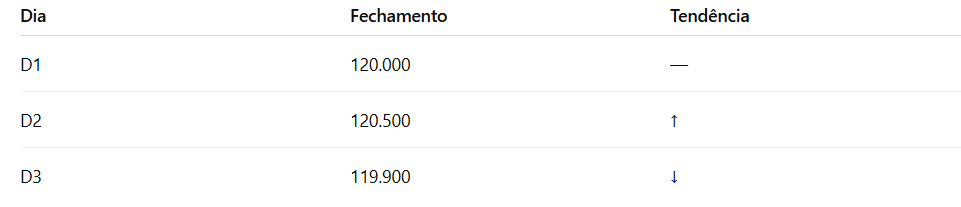

In [1]:
import pandas as pd
import numpy as np
import scipy as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/JacksonvBarbosa/Analise_Indice_Ibovespa/refs/heads/Jackson/Dataset/Dados%20Hist%C3%B3ricos%20-%20Ibovespa.csv"

In [50]:
#df_ibov = pd.read_csv(url)
df_ibov = pd.read_csv("Dados Históricos_Ibovespa_2008-2025.csv")

# Padronização e limpeza dos dados + análise descritiva e exploratória básica

In [51]:
df_ibov_copia = df_ibov.copy()
df_ibov_copia

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,18.06.2025,138.717,138.844,139.161,138.443,"8,32B","-0,09%"
1,17.06.2025,138.840,139.256,139.497,138.293,"8,38B","-0,30%"
2,16.06.2025,139.256,137.212,139.988,137.212,"7,62B","1,49%"
3,13.06.2025,137.213,137.800,137.800,136.586,"8,63B","-0,43%"
4,12.06.2025,137.800,137.127,137.931,136.175,"7,12B","0,49%"
...,...,...,...,...,...,...,...
4310,24.01.2008,57.463,54.242,57.675,54.242,"3,80M","5,95%"
4311,23.01.2008,54.235,56.098,56.098,53.011,"3,72M","-3,32%"
4312,22.01.2008,56.097,53.705,56.541,53.610,"3,65M","4,45%"
4313,21.01.2008,53.709,57.503,57.503,53.487,"3,57M","-6,60%"


## Posivel motivo para o aumento exagerado do volume de negociação desde do início de 2025:  
**Link:** https://forbes.com.br/forbes-money/2025/05/ibovespa-sobe-mais-de-10-em-2025-euforia-ou-otimismo-sustentavel/

O salto no volume negociado do IBOVESPA de milhões para bilhões em 2025 pode ser explicado por uma combinação de fatores que reacenderam o apetite dos investidores:

Entrada de capital estrangeiro: Com a instabilidade nos mercados desenvolvidos — especialmente nos EUA — muitos investidores redirecionaram recursos para mercados emergentes como o Brasil, buscando oportunidades mais atrativas.

Valorização do índice: O IBOVESPA acumulou alta superior a 10% em 2025, o que naturalmente atraiu mais negociações e aumentou o volume financeiro movimentado.

Queda nos juros internacionais: A redução das taxas de juros nos EUA e a expectativa de crescimento de 2% no Brasil criaram um ambiente mais favorável para ativos de risco, como ações.

Recomposição de confiança: Após um 2024 turbulento, com queda de mais de 10% no índice, o mercado brasileiro começou a recuperar a confiança, impulsionado por dados econômicos mais positivos e menor ruído fiscal.

Alta participação de investidores institucionais e fintechs: A modernização do mercado e o crescimento de plataformas digitais também facilitaram o acesso de mais investidores, ampliando o volume de negociações.

In [52]:
display(df_ibov_copia.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4315 entries, 0 to 4314
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      4315 non-null   object 
 1   Último    4315 non-null   float64
 2   Abertura  4315 non-null   float64
 3   Máxima    4315 non-null   float64
 4   Mínima    4315 non-null   float64
 5   Vol.      4314 non-null   object 
 6   Var%      4315 non-null   object 
dtypes: float64(4), object(3)
memory usage: 236.1+ KB


None

In [53]:
display(f'Tamanho do dataset: linhas/coluna{df_ibov_copia.shape}')

'Tamanho do dataset: linhas/coluna(4315, 7)'

In [54]:
display(df_ibov_copia.describe())

,Último,Abertura,Máxima,Mínima
count,4315.000000,4315.000000,4315.000000,4315.000000
mean,79.352198,79.333994,80.080700,78.597684
std,28.359064,28.346476,28.473375,28.232455
min,29.435000,29.438000,31.480000,29.435000
25%,55.813500,55.811000,56.409500,55.244000
50%,67.766000,67.756000,68.198000,67.191000
75%,106.349000,106.317000,107.413500,105.307500
max,140.110000,140.109000,140.382000,138.966000


### Observando as informações dos dados, para melhor manipulação futura devemos converter a coluna **Data** para DateTime e a coluna **Vol.** e **Var%** para Float

1. Qual é a média de fechamento nos ultimos 2 ano?  
* 122 mil pontos  
2. O quanto os pontos estão dispersos da média?  
* mais ou menos 9.3mil pontos
3. Quais foi a mínima e a máxima em pontos que o IBOVESPA alcançou nesses 2 ano?  
* **minima** de 97.926 pontos e uma **máxima** de 140.11 pontos  
4. A mediana está próxima da média de pontos?  
* Sim a **mediana** mais ou menos 3 mil pontos ficando dentro do desvio padrão de fechamentodo indice  


### Uma análise básica exploratória, como uma **mediana** próxima da média nos mostrando que não tivemos umas dispersão significativa vamos ver mais a frente mais da para perceber que não tivemos um outlier nesse periodo

In [55]:
# Varifica dados Nulos
df_ibov_copia.isnull().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        1
Var%        0
dtype: int64

In [57]:
df_ibov_copia[df_ibov_copia['Vol.'].isnull()]

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
2323,10.02.2016,40.377,40.592,40.592,39.96,NaN,"-0,53%"


In [59]:
df_ibov_copia = df_ibov_copia.dropna(axis=0)

In [60]:
df_ibov_copia.isnull().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        0
Var%        0
dtype: int64

In [61]:
# Formatando caracteristica Data e Convertendo em datetime
#df_ibov_copia['Data'] = pd.to_datetime(df_ibov_copia['Data'], format = '%d.%m.%Y').dt.strftime('%d/%m/%Y')
df_ibov_copia['Data'] = pd.to_datetime(df_ibov_copia['Data'], format='%d.%m.%Y')
df_ibov_copia

C:\Users\jacom\AppData\Local\Temp\ipykernel_16940\1479242519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ibov_copia['Data'] = pd.to_datetime(df_ibov_copia['Data'], format='%d.%m.%Y')


,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2025-06-18,138.717,138.844,139.161,138.443,"8,32B","-0,09%"
1,2025-06-17,138.840,139.256,139.497,138.293,"8,38B","-0,30%"
2,2025-06-16,139.256,137.212,139.988,137.212,"7,62B","1,49%"
3,2025-06-13,137.213,137.800,137.800,136.586,"8,63B","-0,43%"
4,2025-06-12,137.800,137.127,137.931,136.175,"7,12B","0,49%"
...,...,...,...,...,...,...,...
4310,2008-01-24,57.463,54.242,57.675,54.242,"3,80M","5,95%"
4311,2008-01-23,54.235,56.098,56.098,53.011,"3,72M","-3,32%"
4312,2008-01-22,56.097,53.705,56.541,53.610,"3,65M","4,45%"
4313,2008-01-21,53.709,57.503,57.503,53.487,"3,57M","-6,60%"


In [62]:
df_ibov_copia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4314 entries, 0 to 4314
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      4314 non-null   datetime64[ns]
 1   Último    4314 non-null   float64       
 2   Abertura  4314 non-null   float64       
 3   Máxima    4314 non-null   float64       
 4   Mínima    4314 non-null   float64       
 5   Vol.      4314 non-null   object        
 6   Var%      4314 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 269.6+ KB


In [63]:
# Função para conversão dos dados de Volume de string para float
## OBS.: Caso acertando com o grupo e vermos a necessidade de mudar par outro tipo fazer a mudança
def converter_volume(vol):
    if pd.isna(vol):
        return np.nan
    vol = vol.upper().replace(',', '').strip()
    if vol.endswith('B'):
        return float(vol[:-1]) * 1e9
    elif vol.endswith('M'):
        return float(vol[:-1]) * 1e6
    elif vol.endswith('K'):
        return float(vol[:-1]) * 1e3
    else:
        return float(vol)
        
df_ibov_copia['Vol.'] = df_ibov_copia['Vol.'].apply(converter_volume)

C:\Users\jacom\AppData\Local\Temp\ipykernel_16940\3726376369.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ibov_copia['Vol.'] = df_ibov_copia['Vol.'].apply(converter_volume)


In [64]:
df_ibov_copia

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2025-06-18,138.717,138.844,139.161,138.443,8.320000e+11,"-0,09%"
1,2025-06-17,138.840,139.256,139.497,138.293,8.380000e+11,"-0,30%"
2,2025-06-16,139.256,137.212,139.988,137.212,7.620000e+11,"1,49%"
3,2025-06-13,137.213,137.800,137.800,136.586,8.630000e+11,"-0,43%"
4,2025-06-12,137.800,137.127,137.931,136.175,7.120000e+11,"0,49%"
...,...,...,...,...,...,...,...
4310,2008-01-24,57.463,54.242,57.675,54.242,3.800000e+08,"5,95%"
4311,2008-01-23,54.235,56.098,56.098,53.011,3.720000e+08,"-3,32%"
4312,2008-01-22,56.097,53.705,56.541,53.610,3.650000e+08,"4,45%"
4313,2008-01-21,53.709,57.503,57.503,53.487,3.570000e+08,"-6,60%"


In [65]:
# Substitui os caracteres (%) por (vázio) e (,) por (.) e converte tipo objeto para float 
df_ibov_copia['Var%'] = df_ibov_copia['Var%'].str.replace('%', '').str.replace(',', '.').astype(float)

C:\Users\jacom\AppData\Local\Temp\ipykernel_16940\457386011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ibov_copia['Var%'] = df_ibov_copia['Var%'].str.replace('%', '').str.replace(',', '.').astype(float)


In [66]:
print(df_ibov_copia[['Vol.', 'Var%']].dtypes)
print(df_ibov_copia[['Vol.', 'Var%']].head())

Vol.    float64
Var%    float64
dtype: object
           Vol.  Var%
0  8.320000e+11 -0.09
1  8.380000e+11 -0.30
2  7.620000e+11  1.49
3  8.630000e+11 -0.43
4  7.120000e+11  0.49


# Evoluindo na análise exploratória com gráficos

In [67]:
df_ibov_copia.iloc[112:,:].describe()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
count,4202,4202.000000,4202.000000,4202.000000,4202.000000,4.202000e+03,4202.000000
mean,2016-07-15 22:00:23.988576768,78.009623,77.995293,78.735201,77.260134,5.508371e+08,0.031947
min,2008-01-18 00:00:00,29.435000,29.438000,31.480000,29.435000,4.243200e+07,-14.780000
25%,2012-04-16 06:00:00,55.548250,55.551250,56.180250,54.955500,2.612500e+08,-0.820000
50%,2016-07-18 12:00:00,67.085500,67.077500,67.649000,66.528000,3.880000e+08,0.040000
75%,2020-10-14 18:00:00,104.274500,104.252000,105.108500,103.403750,8.257500e+08,0.890000
max,2025-01-06 00:00:00,137.344000,137.349000,137.469000,136.664000,2.603000e+09,14.660000
std,NaN,27.461989,27.456052,27.577547,27.337338,4.060462e+08,1.677041


Text(0, 0.5, 'Porcentagem')

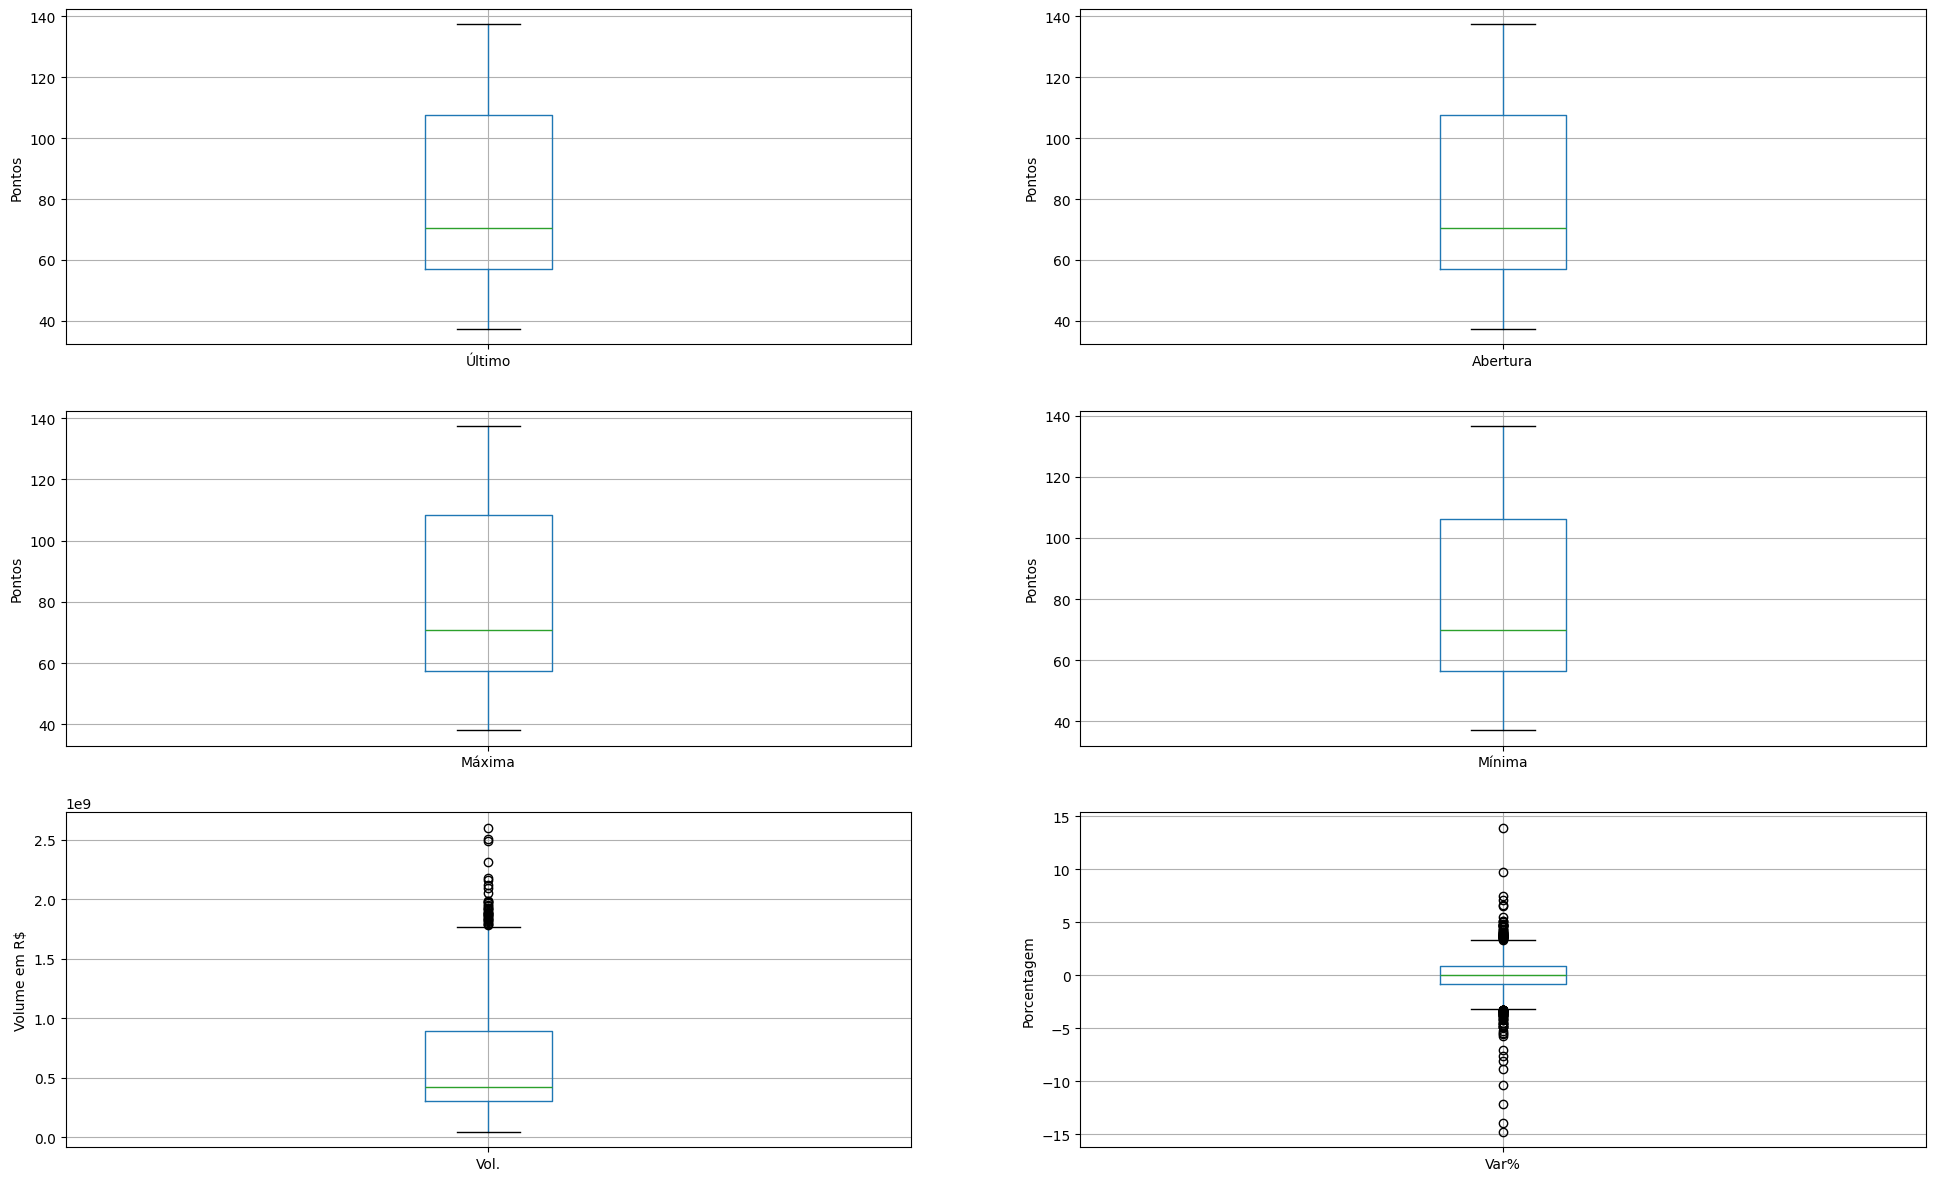

In [74]:
# Avaliando Outliers com Boxplot

plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1) # Parametros -> linhas = 4, colunas = 2, posição = 1(1º gráfico)
fig = df_ibov_copia.iloc[112:3831,:].boxplot(column='Último')
fig.set_title('')
fig.set_ylabel('Pontos')

plt.subplot(4, 2, 2) # Parametros -> linhas = 4, colunas = 2, posição = 1(1º gráfico)
fig = df_ibov_copia.iloc[112:3831,:].boxplot(column='Abertura')
fig.set_title('')
fig.set_ylabel('Pontos')

plt.subplot(4, 2, 3) # Parametros -> linhas = 4, colunas = 2, posição = 1(1º gráfico)
fig = df_ibov_copia.iloc[112:3831,:].boxplot(column='Máxima')
fig.set_title('')
fig.set_ylabel('Pontos')

plt.subplot(4, 2, 4) # Parametros -> linhas = 4, colunas = 2, posição = 1(1º gráfico)
fig = df_ibov_copia.iloc[112:3831,:].boxplot(column='Mínima')
fig.set_title('')
fig.set_ylabel('Pontos')

plt.subplot(4, 2, 5) # Parametros -> linhas = 4, colunas = 2, posição = 1(1º gráfico)
fig = df_ibov_copia.iloc[112:3831,:].boxplot(column='Vol.') # Retirei os dados de 2025 para melhor verificação
fig.set_title('')
fig.set_ylabel('Volume em R$')

plt.subplot(4, 2, 6) # Parametros -> linhas = 4, colunas = 2, posição = 1(1º gráfico)
fig = df_ibov_copia.iloc[112:3831,:].boxplot(column='Var%')
fig.set_title('')
fig.set_ylabel('Porcentagem')

In [70]:
df_ibov_copia['Mes_Ano'] = df_ibov_copia['Data'].dt.to_period('M')
df_ibov_copia.sort_values('Mes_Ano')

C:\Users\jacom\AppData\Local\Temp\ipykernel_16940\3218694361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ibov_copia['Mes_Ano'] = df_ibov_copia['Data'].dt.to_period('M')


,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Mes_Ano
4314,2008-01-18,57.506,57.039,58.291,56.241,5.810000e+08,0.82,2008-01
4313,2008-01-21,53.709,57.503,57.503,53.487,3.570000e+08,-6.60,2008-01
4312,2008-01-22,56.097,53.705,56.541,53.610,3.650000e+08,4.45,2008-01
4311,2008-01-23,54.235,56.098,56.098,53.011,3.720000e+08,-3.32,2008-01
4310,2008-01-24,57.463,54.242,57.675,54.242,3.800000e+08,5.95,2008-01
...,...,...,...,...,...,...,...,...
5,2025-06-11,137.128,136.443,137.531,135.628,8.770000e+11,0.51,2025-06
2,2025-06-16,139.256,137.212,139.988,137.212,7.620000e+11,1.49,2025-06
3,2025-06-13,137.213,137.800,137.800,136.586,8.630000e+11,-0.43,2025-06
1,2025-06-17,138.840,139.256,139.497,138.293,8.380000e+11,-0.30,2025-06


In [90]:
df_ibov_copia.iloc[112:1359,:]

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Mes_Ano
112,2025-01-06,120.022,118.534,120.322,118.534,969000000.0,1.26,2025-01
113,2025-01-03,118.533,120.125,120.356,118.404,980000000.0,-1.33,2025-01
114,2025-01-02,120.125,120.283,120.782,119.120,937000000.0,-0.13,2025-01
115,2024-12-30,120.283,120.267,121.050,120.158,890000000.0,0.01,2024-12
116,2024-12-27,120.269,121.078,121.609,120.252,894000000.0,-0.67,2024-12
...,...,...,...,...,...,...,...,...
1354,2020-01-09,115.947,116.248,116.820,115.411,595000000.0,-0.26,2020-01
1355,2020-01-08,116.247,116.667,117.335,115.693,591000000.0,-0.36,2020-01
1356,2020-01-07,116.662,116.872,117.076,115.965,485000000.0,-0.18,2020-01
1357,2020-01-06,116.878,117.707,117.707,116.269,657000000.0,-0.70,2020-01


C:\Users\jacom\AppData\Local\Temp\ipykernel_16940\873164643.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grafo_linha['Mes_Ano'] = df_ibov_copia['Mes_Ano'].astype(str)


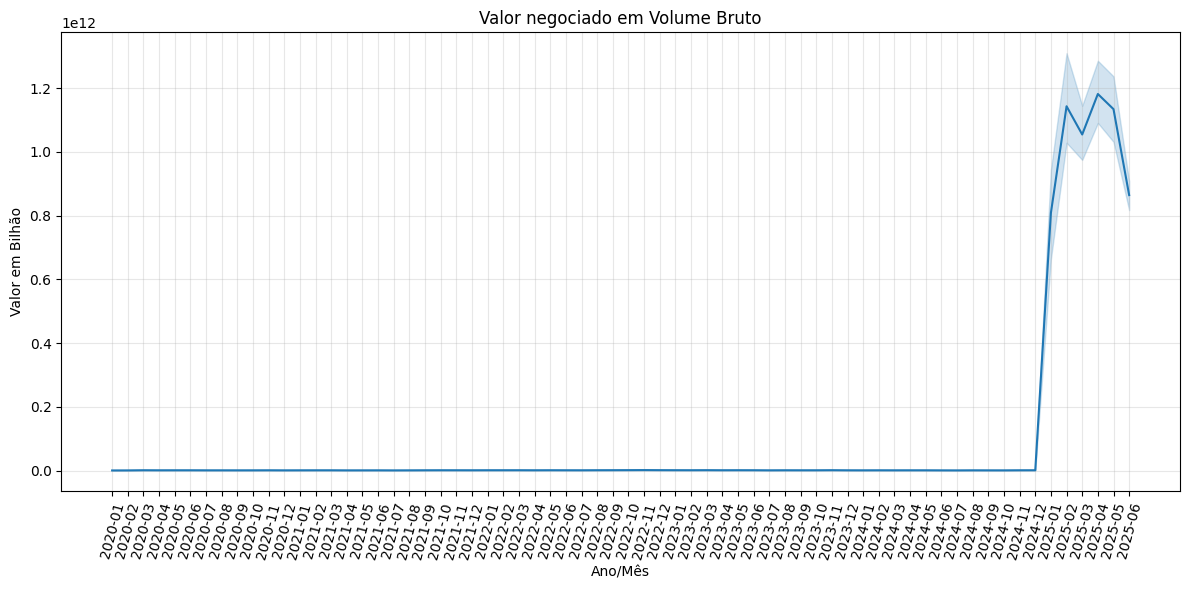

In [92]:
# Observando volume negociado Vol. utilizando dados de 2025

grafo_linha = df_ibov_copia
grafo_linha['Mes_Ano'] = df_ibov_copia['Mes_Ano'].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(data=grafo_linha.iloc[:1359,:].sort_values('Mes_Ano'), x='Mes_Ano', y='Vol.', markers='o')
plt.title('Valor negociado em Volume Bruto')
plt.xlabel('Ano/Mês')
plt.ylabel('Valor em Bilhão')
plt.xticks(rotation=75)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## **Por motivo de alta distorção irei trabalhar com o periodo até o final de 2024**

C:\Users\jacom\AppData\Local\Temp\ipykernel_16940\2775845174.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grafo_linha_1['Mes_Ano'] = df_ibov_copia['Mes_Ano'].astype(str)


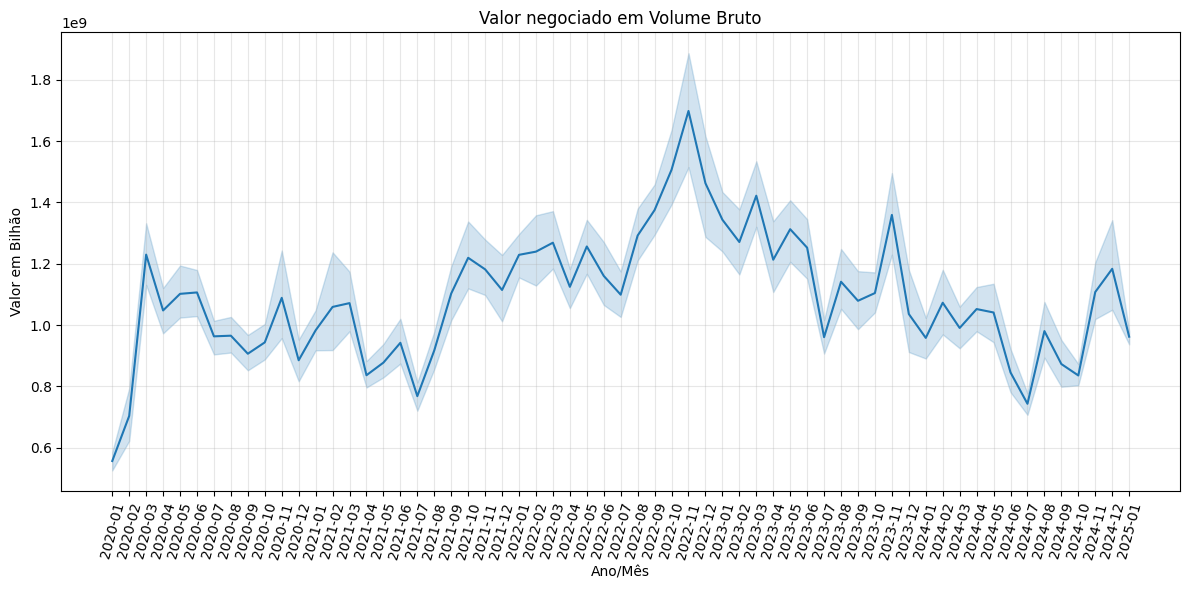

In [93]:
# Observando volume negociado Vol Retirando as negociações até final de 2024.

grafo_linha_1 = df_ibov_copia
grafo_linha_1['Mes_Ano'] = df_ibov_copia['Mes_Ano'].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(data=grafo_linha_1.iloc[112:1359, :].sort_values('Mes_Ano'), x='Mes_Ano', y='Vol.', markers='o')
plt.title('Valor negociado em Volume Bruto')
plt.xlabel('Ano/Mês')
plt.ylabel('Valor em Bilhão')
plt.xticks(rotation=75)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Aqui podemos observar um volume de negociação muito grande no periodo do final do ano de 2024 até o final do segundo trimestre de 2025.

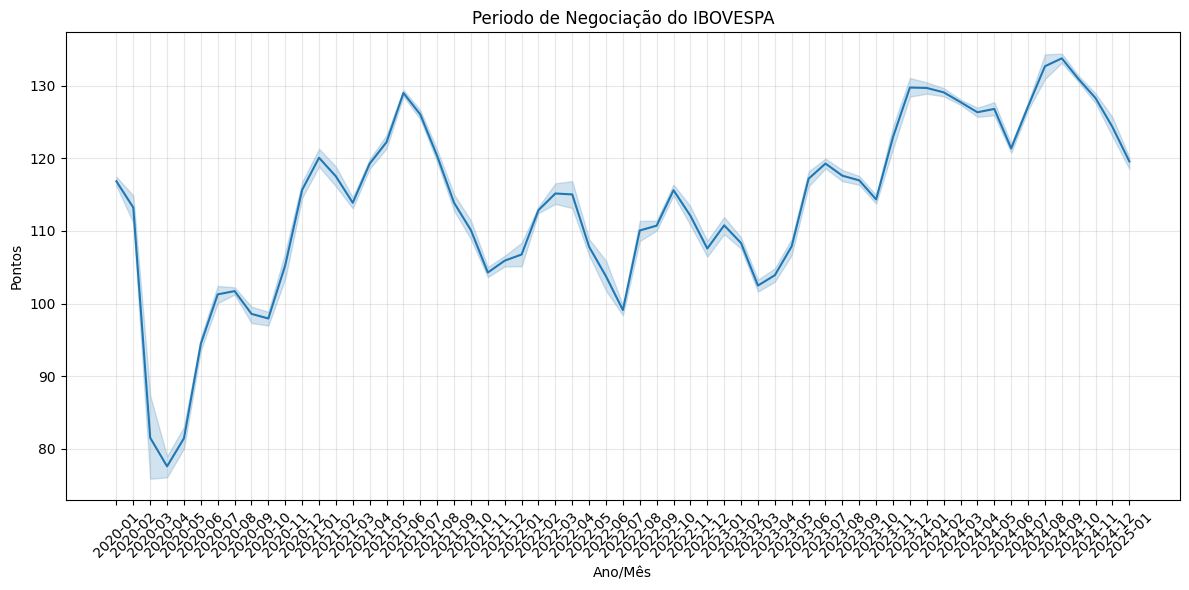

In [94]:
# Observando Negociação do IBOVESPA periodo até 2025.

plt.figure(figsize=(12,6))
sns.lineplot(data=df_ibov_copia.iloc[112:1359, :].sort_values('Mes_Ano'), x='Mes_Ano', y='Último', markers='o')
plt.title('Periodo de Negociação do IBOVESPA')
plt.xlabel('Ano/Mês')
plt.ylabel('Pontos')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

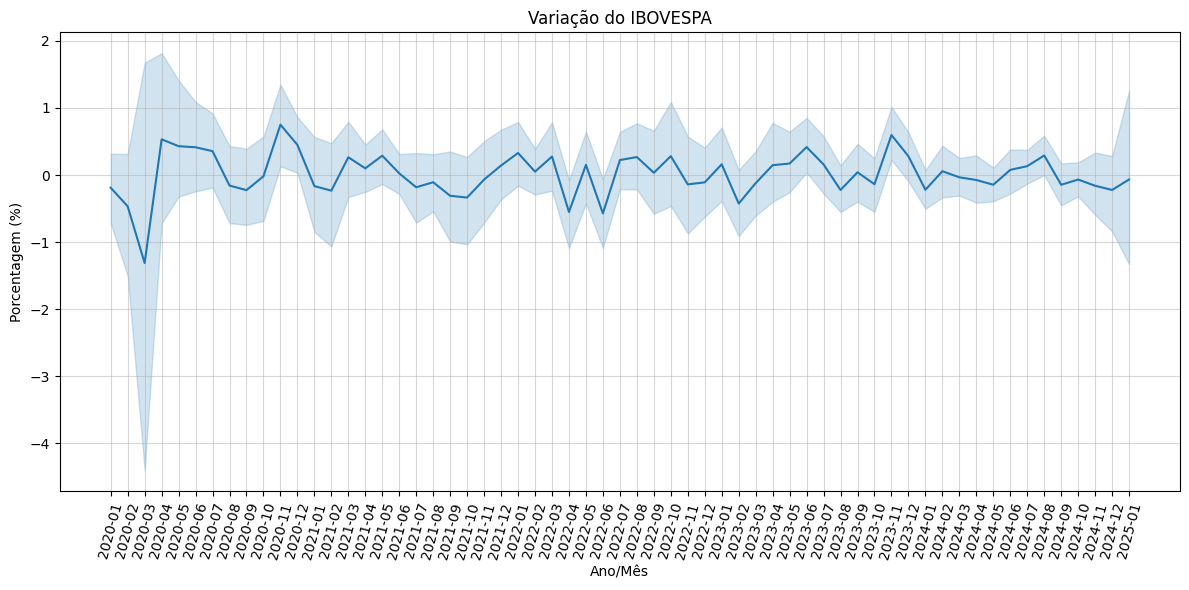

In [96]:
# Observando Variação do IBOVESPA periodo até 2025.

plt.figure(figsize=(12,6))
sns.lineplot(data=df_ibov_copia.iloc[112:1359, :].sort_values('Mes_Ano'), x='Mes_Ano', y='Var%', markers='o')
plt.title('Variação do IBOVESPA')
plt.xlabel('Ano/Mês')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=75)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

In [97]:
df_ibov_copia.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Mes_Ano
0,2025-06-18,138.717,138.844,139.161,138.443,8.320000e+11,-0.09,2025-06
1,2025-06-17,138.840,139.256,139.497,138.293,8.380000e+11,-0.30,2025-06
2,2025-06-16,139.256,137.212,139.988,137.212,7.620000e+11,1.49,2025-06
3,2025-06-13,137.213,137.800,137.800,136.586,8.630000e+11,-0.43,2025-06
4,2025-06-12,137.800,137.127,137.931,136.175,7.120000e+11,0.49,2025-06


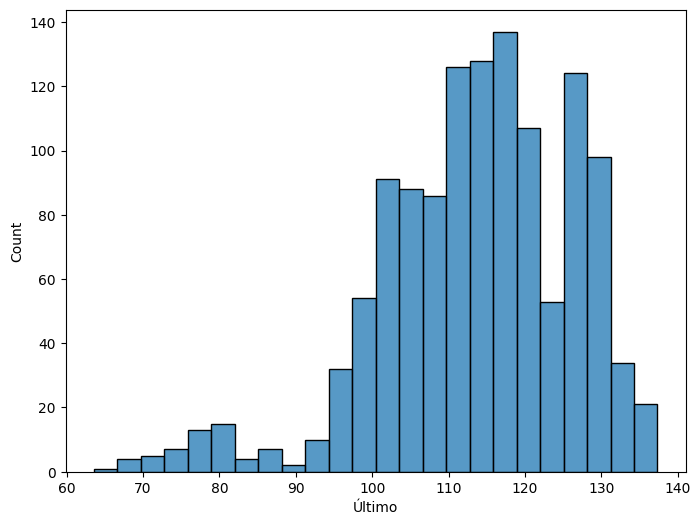

In [98]:
# Verificando a distribuição

plt.figure(figsize=(8,6))
sns.histplot(data=df_ibov_copia.iloc[112:1359, :], x='Último')
plt.show()

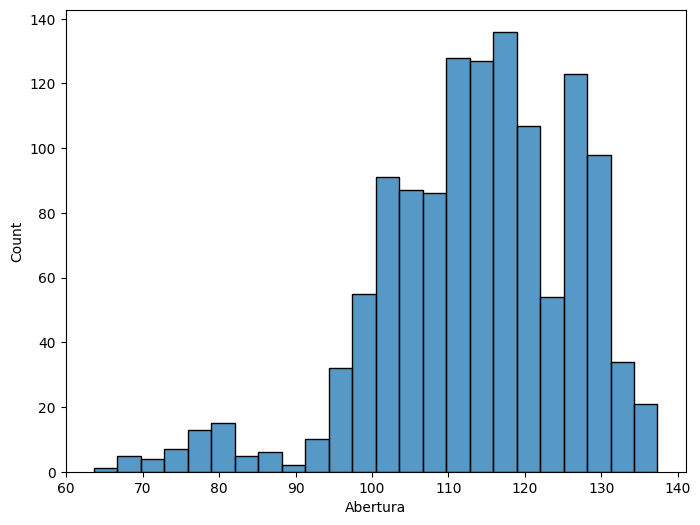

In [99]:
# Verificando a distribuição

plt.figure(figsize=(8,6))
sns.histplot(data=df_ibov_copia.iloc[112:1359, :], x='Abertura')
plt.show()

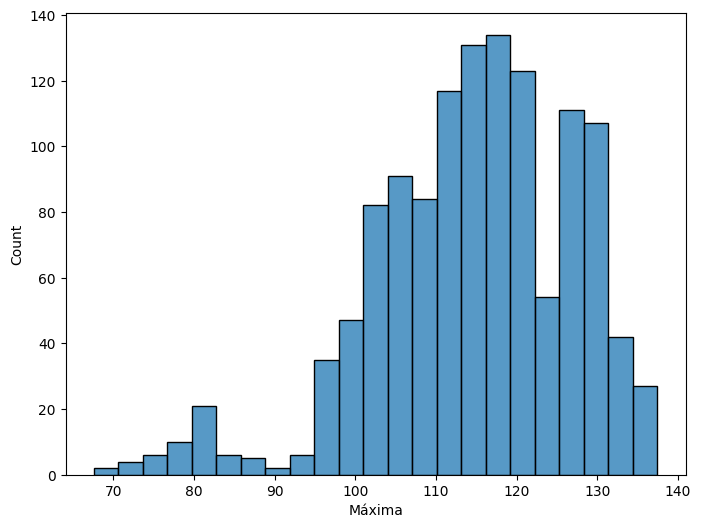

In [100]:
# Verificando a distribuição

plt.figure(figsize=(8,6))
sns.histplot(data=df_ibov_copia.iloc[112:1359, :], x='Máxima')
plt.show()

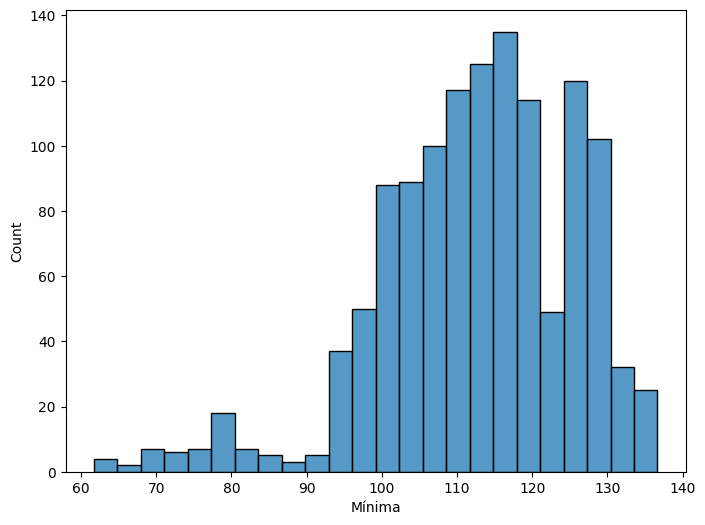

In [101]:
# Verificando a distribuição

plt.figure(figsize=(8,6))
sns.histplot(data=df_ibov_copia.iloc[112:1359, :], x='Mínima')
plt.show()

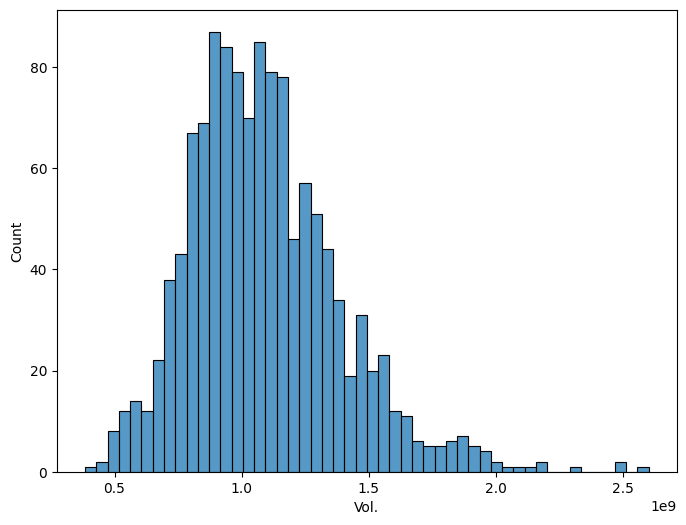

In [106]:
# Verificando a distribuição

plt.figure(figsize=(8,6))
sns.histplot(data=df_ibov_copia.iloc[112:1359, :], x='Vol.', bins=50)
plt.show()

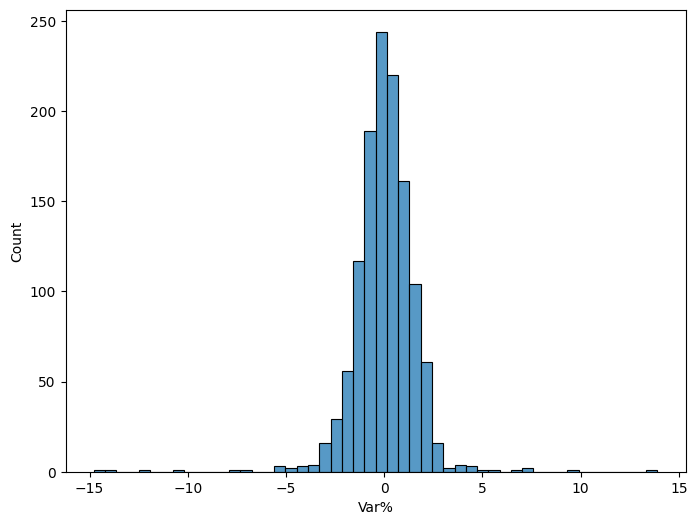

In [105]:
# Verificando a distribuição

plt.figure(figsize=(8,6))
sns.histplot(data=df_ibov_copia.iloc[112:1359, :], x='Var%', bins=50)
plt.show()

## A partir desse ponto irei trabalha com o atributo alvo para buscarmos caracteristicas necessarias para nossos modelos e predições  
### Criar uma caracteristica (coluna) de **fechamento** positivo(1) ou negativo(0) utilizando a caracteristica [Último] como referência

In [24]:
'''Exemplo do metodo Shift ele irá varrer o data frame e conforme o parametro colocado nele ele irá fazer o deslocamento
para linha seguinte ou anterior
Ex.: Shift(n) -> Compara valores anteriores (n>0)
     Shift(n) -> Compara valores seguintes (n<0) Vamos usar este para buscar valores seguintes
     Shift(n) -> Compara com o dia anterior (n=1)

''' 
# Exemplos de uso
df = pd.DataFrame({'Preço': [100, 102, 101, 105]})
df['Anterior'] = df['Preço'].shift(1)
df['Seguinte'] = df['Preço'].shift(-1)

df

## Não tem a necessidade de Rodar esse código

,Preço,Anterior,Seguinte
0,100,NaN,102.0
1,102,100.0,101.0
2,101,102.0,105.0
3,105,101.0,NaN


In [25]:
# Caso quisermos utilizar o loop for

'''fechamento = df_ibov['Último'].values
fechamento_categoria = []

for i in range(len(fechamento) - 1):
    if fechamento[i + 1] > fechamento[i]:
        fechamento_categoria.append(1)
    else:
        fechamento_categoria.append(0)

# Como comparamos até o penúltimo, o último dia não tem "dia seguinte"
fechamento_categoria.append(None)  # ou np.nan se preferir

# Adiciona a nova coluna no DataFrame
#df_ibov['Subiu_dia_seguinte'] = fechamento_categoria

print(fechamento_categoria)'''

'fechamento = df_ibov[\'Último\'].values\nfechamento_categoria = []\n\nfor i in range(len(fechamento) - 1):\n    if fechamento[i + 1] > fechamento[i]:\n        fechamento_categoria.append(1)\n    else:\n        fechamento_categoria.append(0)\n\n# Como comparamos até o penúltimo, o último dia não tem "dia seguinte"\nfechamento_categoria.append(None)  # ou np.nan se preferir\n\n# Adiciona a nova coluna no DataFrame\n#df_ibov[\'Subiu_dia_seguinte\'] = fechamento_categoria\n\nprint(fechamento_categoria)'

In [107]:
# Renomeando nome da Coluna Último para Fechamento_Diario
df_ibov_copia = df_ibov_copia.rename(columns={"Último": "Fechamento_Diario"})

In [108]:
# Cria a coluna fechamento com valores Binarios 0 para negativo e 1 para positivo
df_ibov_copia['Tendencia'] = (df_ibov['Último'].shift(-1) > df_ibov['Último']).astype('Int64')

In [109]:
# Setando data como indice ()index
df_ibov_copia = df_ibov_copia.set_index('Data')
df_ibov_copia

,Fechamento_Diario,Abertura,Máxima,Mínima,Vol.,Var%,Mes_Ano,Tendencia
Data,,,,,,,,
2025-06-18,138.717,138.844,139.161,138.443,8.320000e+11,-0.09,2025-06,1
2025-06-17,138.840,139.256,139.497,138.293,8.380000e+11,-0.30,2025-06,1
2025-06-16,139.256,137.212,139.988,137.212,7.620000e+11,1.49,2025-06,0
2025-06-13,137.213,137.800,137.800,136.586,8.630000e+11,-0.43,2025-06,1
2025-06-12,137.800,137.127,137.931,136.175,7.120000e+11,0.49,2025-06,0
...,...,...,...,...,...,...,...,...
2008-01-24,57.463,54.242,57.675,54.242,3.800000e+08,5.95,2008-01,0
2008-01-23,54.235,56.098,56.098,53.011,3.720000e+08,-3.32,2008-01,1
2008-01-22,56.097,53.705,56.541,53.610,3.650000e+08,4.45,2008-01,0


In [110]:
# Existe dados Nulos
df_ibov_copia.isnull().sum()

Fechamento_Diario    0
Abertura             0
Máxima               0
Mínima               0
Vol.                 0
Var%                 0
Mes_Ano              0
Tendencia            0
dtype: int64

In [111]:
# Inicio e fim do ano de extraidos do dataset
print(f'Data Inicial: {df_ibov_copia.index.min()}')
print(f'Data Inicial: {df_ibov_copia.index.max()}')

Data Inicial: 2008-01-18 00:00:00
Data Inicial: 2025-06-18 00:00:00


In [112]:
# Temos dados duplicados
df_ibov_copia.duplicated().sum()

np.int64(0)

<Axes: >

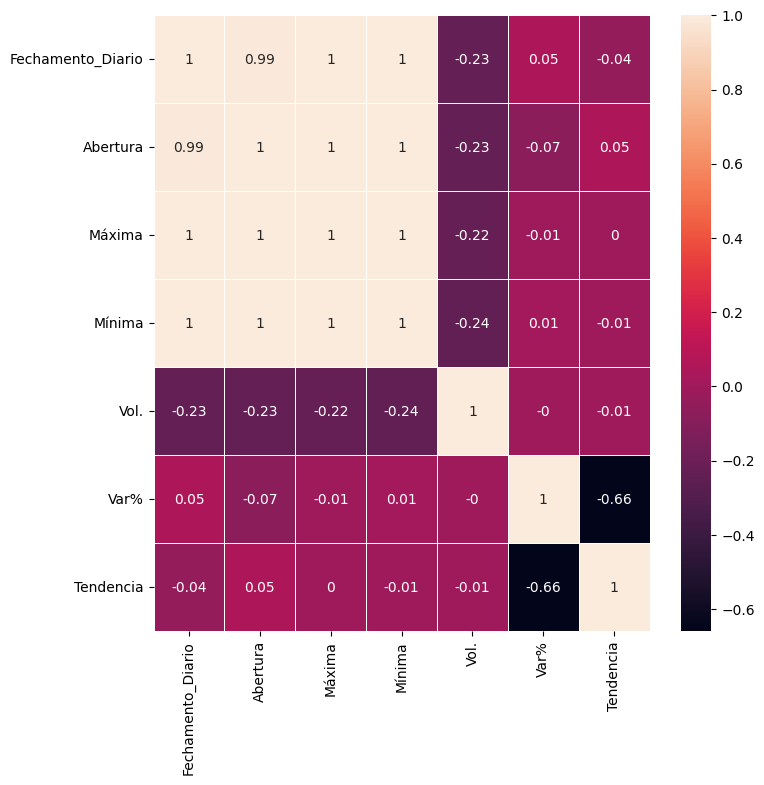

In [113]:
# Criar um mapa de correlação como heatmap

correlation_matrix = df_ibov_copia.iloc[112:1359, :].corr(numeric_only=True).round(2)

fig, ax = plt.subplots(figsize=(8,8))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

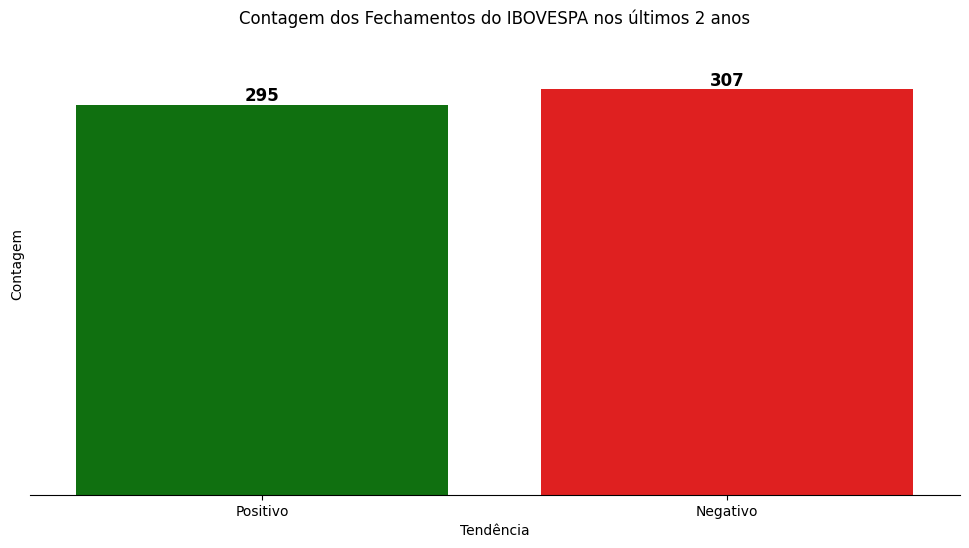

In [35]:
# Quantidade de dias que o IBOVESPA teve o fechamento Positivo e Negativo

# Substitui 0 por 'Negativo' e 1 por 'Positivo'
df_temp = df_ibov_copia.copy()
df_temp['Tendencia'] = df_temp['Tendencia'].map({0: 'Negativo', 1: 'Positivo'})

# Define as cores desejadas para cada categoria
palette_cores = {'Negativo': 'red', 'Positivo': 'green'}

# Gráfico de barra
fig, axes = plt.subplots(figsize=(12,6))

sns.countplot(data=df_temp, x='Tendencia', hue='Tendencia', ax=axes, palette=palette_cores, legend=False)

# Adiciona os labels (valores) nas barras
for p in axes.patches:
    altura = p.get_height()
    axes.annotate(f'{int(altura)}',  # texto (valor da barra)
                  (p.get_x() + p.get_width() / 2, altura),  # posição do texto
                  ha='center', va='bottom', fontsize=12, fontweight='bold')

# Remove os números do eixo Y
axes.set_yticks([])

axes.set_xlabel('Tendência')
axes.set_ylabel('Contagem')
axes.set_ylim(0, 350)
axes.set_title('Contagem dos Fechamentos do IBOVESPA nos últimos 2 anos')
sns.despine(left=True)
plt.show()

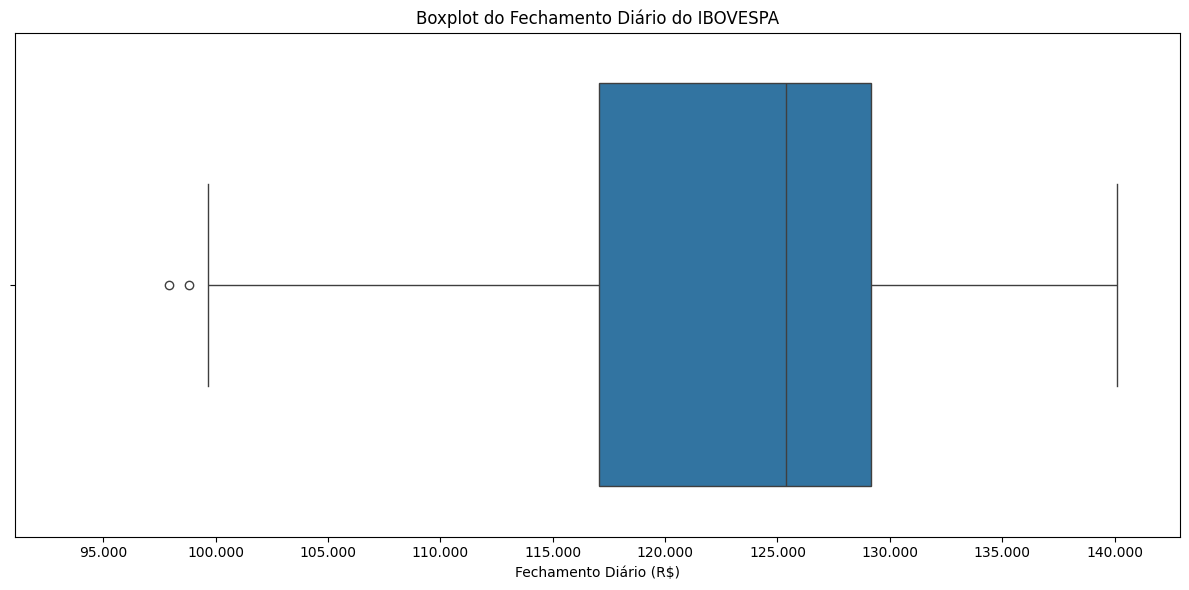

In [36]:
from matplotlib.ticker import FuncFormatter, MultipleLocator

# Copia e ajusta os dados
df_temp_fech = df_ibov_copia.copy()
df_temp_fech["Fechamento_Diario"] = df_temp_fech["Fechamento_Diario"] * 1000

# Criação do gráfico
fig, axes = plt.subplots(figsize=(12,6))
sns.boxplot(data=df_temp_fech, x="Fechamento_Diario", ax=axes)

# Valores mínimo e máximo
min_val = df_temp_fech['Fechamento_Diario'].min() - 5000
max_val = df_temp_fech['Fechamento_Diario'].max()

# Limites com margem de 2%
axes.set_xlim(min_val * 0.98, max_val * 1.02)

# Ticks de 5.000 em 5.000
axes.xaxis.set_major_locator(MultipleLocator(5000))

# Formata para exibir separador de milhar
formatter = FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')) # _: o segundo argumento é exigido pelo FuncFormatter, mas não precisamos dele aqui (por isso usamos _ como convenção de "ignorado").
axes.xaxis.set_major_formatter(formatter)

# Estética
axes.set_xlabel('Fechamento Diário (R$)')
axes.set_title('Boxplot do Fechamento Diário do IBOVESPA')
plt.tight_layout()
plt.show()